### Predict Customer Churn Using  Python & Machine Learning

Customer Churn: occurs when subscribers or customers stop doing business with a company or service. A business typically treats a customer as churned once a specific amount of time has passed since the customers last interaction with the business or service.

Retaining customers is obviously important for companies, because it boosts that companies revenue and helps the company to build a meaningful relationship with the customer. What might not be so obvious is that customer retention is actually more valuable than customer acquisition and there is a lot of data to back this claim.

#### 5 Reasons Why Customer Retention Is Important
1. Companies save money on marketing.
2. Repeat purchases from repeat customers means repeat profit.
3. Free word-of-mouth advertising.
4. Retained customers provide valuable feedback.
5. Previous customers will pay premium prices.

I will attempt to create a model that can accurately predict / classify if a customer is likely to churn. I will also analyze the data to come up with a possible strategic retention plan.
 
The data set that will be used in this analysis will come from the Telco company.

In [8]:
# This python program will predict customer churn

In [9]:
# Import libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [10]:
# Load the data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [11]:
# Print the data
df.head(50)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [12]:
# Get the number of rows and column in the data set
df.shape

(7043, 21)

In [13]:
# Show all the column names
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [14]:
# Check for missing data
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
# Show statistics on the current data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [16]:
# Get the number of customers that churned
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

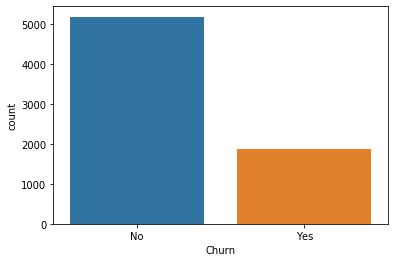

In [17]:
# Let's visualize the count of customer churn
sns.countplot(df['Churn'])

In [18]:
# What % of customers are leaving?
retained = df[df['Churn'] == 'No']
churned = df[df['Churn'] == 'Yes']
num_retained = retained.shape[0]
num_churned = churned.shape[0]

# Print the % of customers that stayed and left
print(round((num_retained / (num_retained + num_churned)*100), 2),'% of customers stayed with the company')
print(round((num_churned / (num_retained + num_churned)*100), 2),'% of customers left the company')


73.46 % of customers stayed with the company
26.54 % of customers left the company


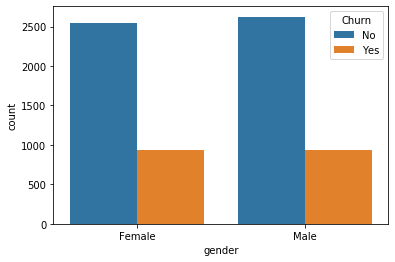

In [19]:
# Let's visualize the churn count for both males and females
sns.countplot(x = 'gender', hue = 'Churn', data = df)

In [20]:
# From the plot above, it looks like gender does not play a role in customer churn. Let’s visualize the churn count for the internet service.

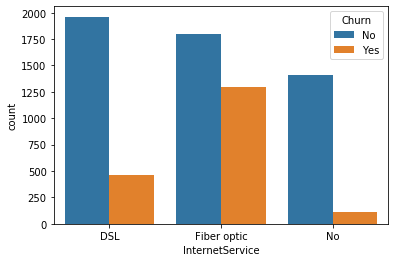

In [21]:
# Let's visualize the churn for the internet service
sns.countplot(x = 'InternetService', hue = 'Churn', data = df)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021C65BA7548>,
      dtype=object)

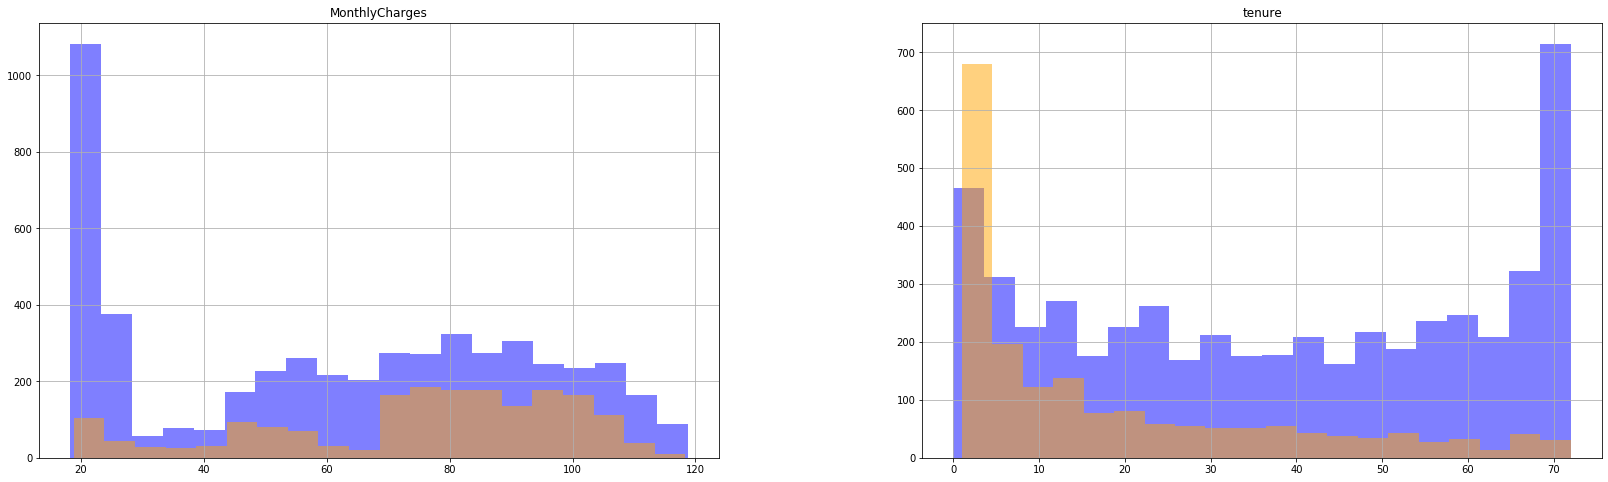

In [22]:
# Visually look at the tenure and monthly charges columns to see if there is any discrimination for customer churn. To do this I will create a histogram plot
numerical_features = ['tenure', 'MonthlyCharges']
fig, ax = plt.subplots(1, 2, figsize = (28, 8))
df[df['Churn'] == 'No'][numerical_features].hist(bins = 20, color = 'blue', alpha = 0.5, ax = ax)
df[df['Churn'] == 'Yes'][numerical_features].hist(bins = 20, color = 'orange', alpha = 0.5, ax = ax)
            

From the two charts above, I can clearly see that there is some discrimination in the data. The monthly charges chart (on the left) shows that most of the loyal customers that stayed with the company had a monthly charge between $20 and $30. Most of the customers that churned had a monthly charge of $70 to $100. Maybe the company should lower the monthly charges to retain customers.

The tenure chart (on the right) shows some discrimination as well. From the chart, I can see that most of the customers that churned had between 1 and 9 months with the company, while most of the retained customers had a tenure between 24 and 72 months which is 2 to 6 years. So, it may be in the companies best interest to try everything they can to keep their customers for at least 2 years.

### Data Processing & Cleaning

In [23]:
# Remove the unnecessary column customerID
cleaned_df = df.drop('customerID', axis = 1)  

In [24]:
# Let's look at the number of rows and columns
cleaned_df.shape

(7043, 20)

In [25]:
cleaned_df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [26]:
# Convert all the non-numeric columns to numerical data types
for column in cleaned_df.columns:
    if cleaned_df[column].dtype == np.number:
        continue
    else:
        cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])

In [27]:
#Show the new data set data types
cleaned_df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
Churn                 int32
dtype: object

In [28]:
# Show the first 5 rows of the new data set
cleaned_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [29]:
# Scale the data
X = cleaned_df.drop('Churn', axis = 1)
Y = cleaned_df['Churn']

# Standardizing / scaling the features
X = StandardScaler().fit_transform(X)

In [30]:
# Split the data into 80% training and 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [31]:
# Create the model
# model = LogisticRegression()

# # Train the model
# model.fit(X_train, Y_train)

In [32]:
# Create functions for different models
def models (X_train, Y_train):
    # Using Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, Y_train)
    
    # Using KNN Classifier
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(X_train, Y_train)
    
    # Using SVC Linear
    from sklearn.svm import SVC
    svc_ln = SVC(kernel = 'linear', random_state = 0)
    svc_ln.fit(X_train, Y_train)
    
    # Using SVC rbf
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'linear', random_state = 0)
    svc_rbf.fit(X_train, Y_train)

    # Using GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)
    
    # Using DecisionTreeClassifier
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, Y_train)
    
    # Using RandonForestClassifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, Y_train)
    
    # Print model accuracy on the training data
    print('[0] Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
    
    print('[1] KNN Training Accuracy:', knn.score(X_train, Y_train))
    
    print('[2] SVM (Linear Classifier) Training Accuracy:', svc_ln.score(X_train, Y_train))
    
    print('[3] SMV (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
    
    print('[4] Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
    
    print('[5] Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
    
    print('[6] Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
    
    return log, knn, svc_ln, svc_rbf, gauss, tree, forest
       

In [33]:
# Create the model that contains all of the models, and look at the accuracy score
model = models(X_train, Y_train)

C:\Users\uddimoh1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0] Logistic Regression Training Accuracy: 0.8044018459353922
[1] KNN Training Accuracy: 0.8281860134895279
[2] SVM (Linear Classifier) Training Accuracy: 0.7980120695775648
[3] SMV (RBF Classifier) Training Accuracy: 0.7980120695775648
[4] Gaussian Naive Bayes Training Accuracy: 0.7559460418885339
[5] Decision Tree Classifier Training Accuracy: 0.9985800496982605
[6] Random Forest Classifier Training Accuracy: 0.9829605963791267


In [34]:
# Confusion matrix and accuracy
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
    cm = confusion_matrix(Y_test, model[i].predict(X_test))
    
    TN = cm[0][0]
    TP = cm[1][1]
    FN = cm[1][0]
    FP = cm[0][1]
    
    print(cm)
    
      
    print('Model[{}] Testing Accuracy = "{}"'.format(i, (TP + TN)/(TP + TN + FN + FP)))
    print() # print a new line
    

[[940  96]
 [161 212]]
Model[0] Testing Accuracy = "0.8176011355571328"

[[896 140]
 [176 197]]
Model[1] Testing Accuracy = "0.7757274662881476"

[[937  99]
 [153 220]]
Model[2] Testing Accuracy = "0.8211497515968772"

[[937  99]
 [153 220]]
Model[3] Testing Accuracy = "0.8211497515968772"

[[780 256]
 [ 85 288]]
Model[4] Testing Accuracy = "0.7579843860894251"

[[816 220]
 [190 183]]
Model[5] Testing Accuracy = "0.709013484740951"

[[948  88]
 [196 177]]
Model[6] Testing Accuracy = "0.7984386089425124"



In [35]:
# Other ways to get the classification accuracy & metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
    print('Model',i)
    #Check precision, recall, f1-score
    print(classification_report(Y_test, model[i].predict(X_test)))
    
    # Model Accuracy
    print(accuracy_score(Y_test, model[i].predict(X_test)))
    print() # print a new line


Model 0
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.57      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

0.8176011355571328

Model 1
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1036
           1       0.58      0.53      0.55       373

    accuracy                           0.78      1409
   macro avg       0.71      0.70      0.70      1409
weighted avg       0.77      0.78      0.77      1409

0.7757274662881476

Model 2
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.59      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted a

#### Evaluate the model

In [41]:
# Logistic Regression performed the best with an accuracy of 81.7%
# Print prediction of Logistic Regression model
pred = model[0].predict(X_test)
print(pred)

print() # print a space

# Print the actual values
print(Y_test.values)

[1 0 0 ... 0 0 1]

[1 0 0 ... 0 0 1]


From the report, I can see that the recall of the model is about 91% meaning the model correctly identified about 91% of the customers that were retained and missed about 9%.

The precision of the model was about 85% and the f1-score was about 88%. The accuracy of the model was about 81.7% which is better than the 73.46% that I could’ve done just by guessing a customer would always stay with the company.

#### Recommendations:
The company may want to lower it’s monthly charges at least for new customers for the first 2 years and stop providing fiber optics internet service, this may be a good strategy to help retain their customers and reduce customer churn.